In [1]:
import cv2
import os

CURRENT_DIR = os.path.abspath('')

def load_images_from_folder(folder, n_images):
    images = []
    for fname in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, fname))
        if img is not None:
            images.append([fname, img])

        n_images -= 1
        if n_images == 0:
            break

    return images

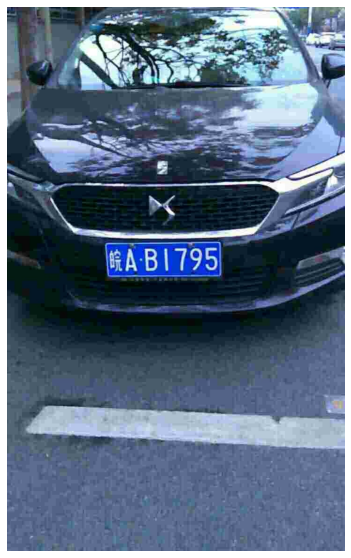

In [2]:
from matplotlib import pyplot as plt

imgs_path = os.path.join(CURRENT_DIR, '../dirty_data/ccpd_tiny')
fname_sample, img_sample = load_images_from_folder(imgs_path, 10)[3]
plt.figure(figsize = (25,10))
plt.axis("off")
plt.imshow(cv2.cvtColor(img_sample, cv2.COLOR_BGR2RGB))

In [3]:
AREA, TILT, BBOX, VERT, LPN, BRIGHT, BLUR = [
    _ for _ in range(7)
]

def coords_to_int(arr):
    arr = arr.split('_')
    return [
        list(
            map(int, e.split('&'))
        )
        for e in arr
    ]

def split_fname(fname):
    no_extension, ext = os.path.splitext(fname)
    fname_split = no_extension.split('-')
    fname_split[TILT] = coords_to_int(fname_split[TILT])
    fname_split[BBOX] = coords_to_int(fname_split[BBOX])
    fname_split[VERT] = coords_to_int(fname_split[VERT])

    return fname_split, ext

fname_sample_split, ext = split_fname(fname_sample)
fname_sample_split

['017650862069',
 [[90], [87]],
 [[212, 502], [462, 586]],
 [[463, 578], [214, 580], [211, 500], [460, 498]],
 '0_0_1_25_31_33_29',
 '95',
 '76']

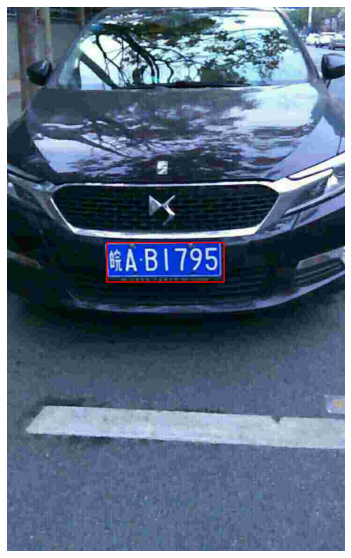

In [4]:
xs, ys = fname_sample_split[BBOX]

img_sample_bbox = img_sample.copy()
cv2.rectangle(img_sample_bbox, xs, ys, (0, 0, 255), 2)
plt.figure(figsize = (25,10))
plt.axis("off")
plt.imshow(cv2.cvtColor(img_sample_bbox, cv2.COLOR_BGR2RGB))

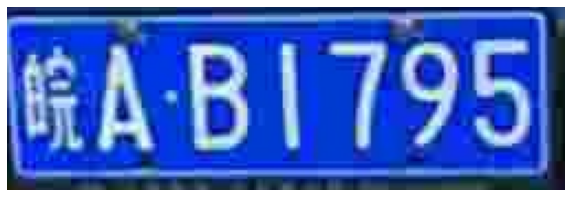

In [5]:
xs = [e[0] for e in fname_sample_split[VERT]]
ys = [e[1] for e in fname_sample_split[VERT]]

x_tl, x_br = min(xs), max(xs)
y_tl, y_br = min(ys), max(ys)

plt.figure(figsize = (10,5))
plt.axis("off")
plt.imshow(cv2.cvtColor(img_sample[y_tl:y_br+1, x_tl:x_br+1], cv2.COLOR_BGR2RGB))

In [20]:
provinces = ["皖", "沪", "津", "渝", "冀", "晋", "蒙", "辽", "吉", "黑", "苏", "浙", "京", "闽", "赣", "鲁", "豫", "鄂", "湘", "粤", "桂", "琼", "川", "贵", "云", "藏", "陕", "甘", "青", "宁", "新", "警", "学", "O"]
alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W',
             'X', 'Y', 'Z', 'O']
ads = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
       'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'O']

CHARS = ['京', '沪', '津', '渝', '冀', '晋', '蒙', '辽', '吉', '黑',
         '苏', '浙', '皖', '闽', '赣', '鲁', '豫', '鄂', '湘', '粤',
         '桂', '琼', '川', '贵', '云', '藏', '陕', '甘', '青', '宁',
         '新',
         '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
         'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K',
         'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
         'W', 'X', 'Y', 'Z','_'
         ]
CHARS_DICT = {char:i for i, char in enumerate(CHARS)}

lpn = fname_sample_split[LPN].split('_')
lpn = [int(l) for l in lpn]

new_lpn = []
new_lpn.append(CHARS_DICT[provinces[lpn[0]]])
new_lpn.append(CHARS_DICT[alphabets[lpn[1]]])
for l in lpn[2:]:
    new_lpn.append(
        CHARS_DICT[ads[l]]
    )

print(new_lpn)
print([CHARS[l] for l in new_lpn])

[12, 41, 42, 32, 38, 40, 36]
['皖', 'A', 'B', '1', '7', '9', '5']


In [22]:
CHARS_DICT['9']

40

In [23]:
img_sample.shape

(1160, 720, 3)

In [25]:
type(img_sample)

numpy.ndarray